In [3]:
using QuadGK, PyPlot, DelimitedFiles

In [4]:
function ic(x,y)
    s2  = 0.03^2
    floor = 1e-4
    pulse = 1.0/(4.0*pi*s2)*exp(-(x^2+y^2)/(4.0*s2))
    return max(floor,pulse)
end

ic (generic function with 1 method)

In [18]:
quadpoints = readdlm("../points.txt");
quadweights = readdlm("../weights.txt")
nx = 200
ny = 200
nq = 36
X = range(-1.5,stop=1.5,length=nx)
Y = range(-1.5,stop=1.5,length=ny)
sigmat = 1.0
t = 1.0

1.0

In [22]:
psi0 = zeros(nq,nx,ny)
phi0 = zeros(nx,ny)
for i=1:nx
    for j=1:ny
        for q=1:nq
            xx = X[i] - t*quadpoints[q,1]
            yy = Y[j] - t*quadpoints[q,2]
            psi0[q,i,j] = exp(-sigmat*t)*ic(xx,yy) 
        end
        phi0[i,j] = sum(psi0[:,i,j].*quadweights)/4/pi
    end
end

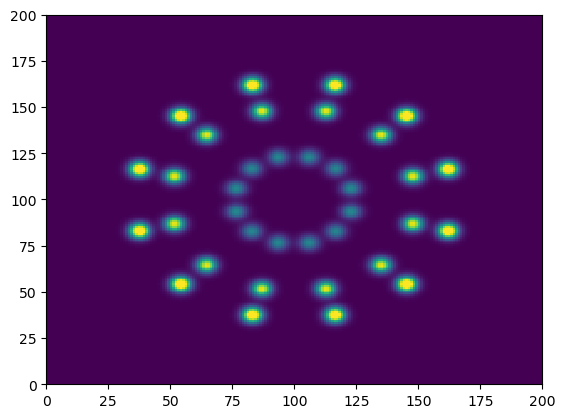

PyObject <matplotlib.collections.QuadMesh object at 0x7f13f347a9d0>

In [24]:
PyPlot.pcolormesh(phi0,vmin = 0.0,vmax = 1)

In [17]:
minimum(phi0)

0.00046229093991636877

In [26]:
writedlm("phi0.txt",phi0)